# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


**id** — уникальный идентификатор скважины;  
**f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);  
**product** — объём запасов в скважине (тыс. баррелей).  

**Условия задачи:**  
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).  
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  Бюджет на разработку скважин в регионе — 10 млрд рублей.  
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.



## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp
import scipy.stats
from numpy.random import RandomState
state = RandomState(12345)

In [ ]:
try:
    data_1 = pd.read_csv('datasets/geo_data_0.csv')  # Локальный путь
except:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')  # Серверный путь

In [3]:
try:
    data_2 = pd.read_csv('datasets/geo_data_1.csv')  # Локальный путь
except:
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')  # Серверный путь

In [4]:
try:
    data_3 = pd.read_csv('datasets/geo_data_2.csv')  # Локальный путь
except:
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')  # Серверный путь

In [5]:
print(data_1.head())
print()
print(data_1.info())
print()
print(data_1.describe())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580  

In [6]:
print(data_2.head())
print()
print(data_2.info())
print()
print(data_2.describe())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%       

In [7]:
print(data_3.head())
print()
print(data_3.info())
print()
print(data_3.describe())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288  

In [8]:
data_1.duplicated().sum()

0

<div class="alert alert-success">

<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Молодец, что не забыла проверить на дубликаты!
</div>

In [9]:
np.unique(data_1['product'])

array([0.00000000e+00, 4.02152316e-03, 6.11363631e-03, ...,
       1.85355615e+02, 1.85362690e+02, 1.85364347e+02])

In [10]:
data_2.duplicated().sum()

0

In [11]:
np.unique(data_2['product'])

array([  0.        ,   3.17910258,  26.95326103,  30.13236361,
        53.90652206,  57.08562465,  80.85978309,  84.03888568,
       107.81304413, 110.99214671, 134.76630516, 137.94540774])

In [12]:
data_3.duplicated().sum()

0

In [13]:
np.unique(data_3['product'])

array([0.00000000e+00, 4.60600004e-03, 9.20411196e-03, ...,
       1.90011722e+02, 1.90013589e+02, 1.90029838e+02])

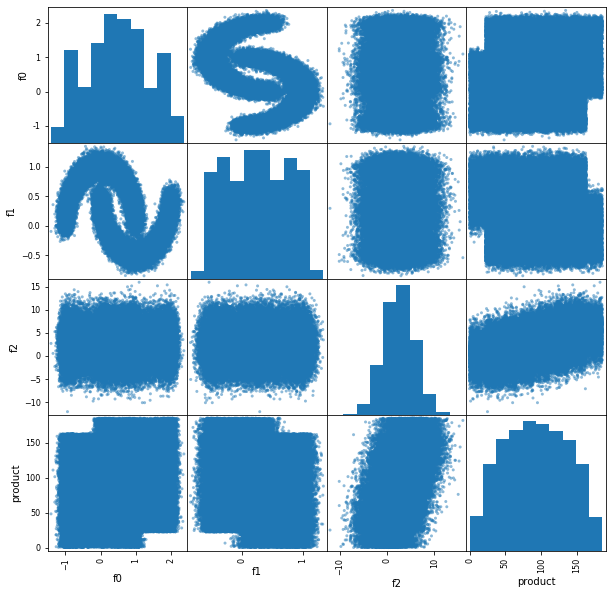

In [14]:
pd.plotting.scatter_matrix(data_1, figsize = (10,10))
plt.show()

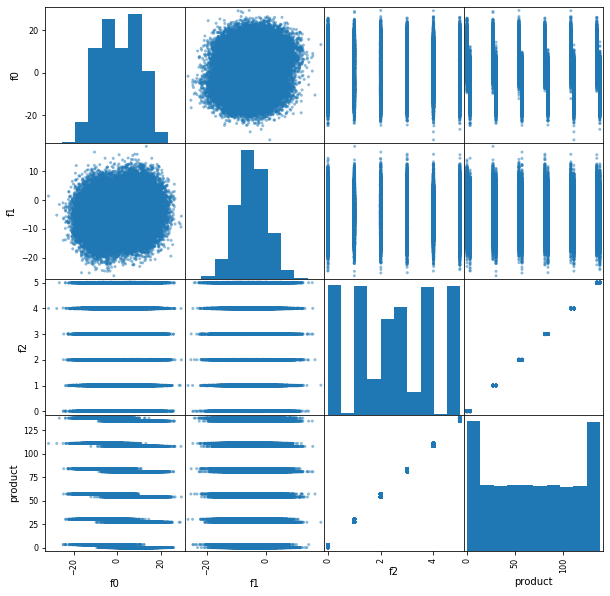

In [15]:
pd.plotting.scatter_matrix(data_2, figsize = (10,10))
plt.show()

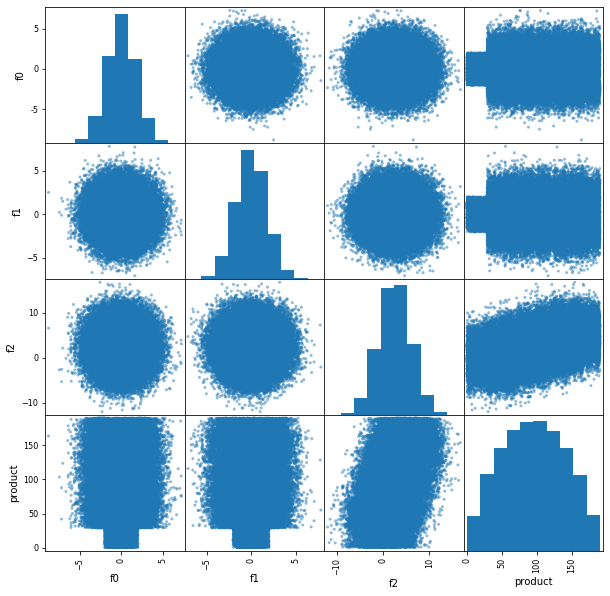

In [16]:
pd.plotting.scatter_matrix(data_3, figsize = (10,10))
plt.show()

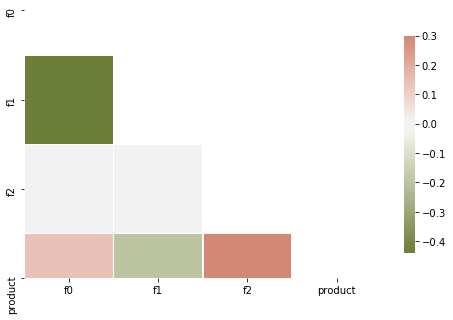

In [17]:
mask = np.triu(np.ones_like(data_1.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(data_1.corr(), mask=mask, 
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

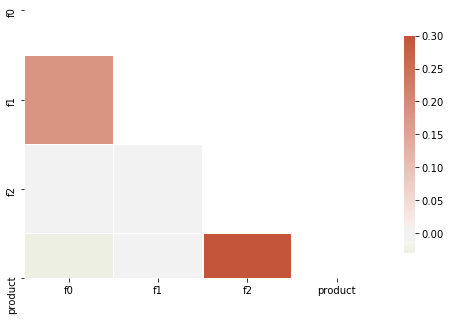

In [18]:
mask = np.triu(np.ones_like(data_2.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(data_2.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

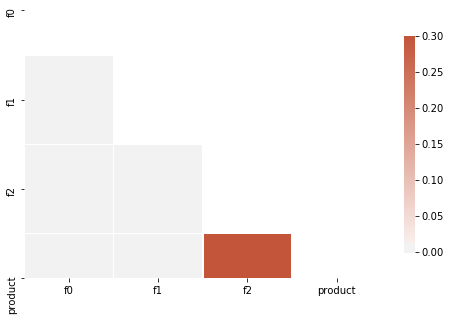

In [19]:
mask = np.triu(np.ones_like(data_3.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(data_3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
display(data_1.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [21]:
display(data_2.corr())

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [22]:
display(data_3.corr())

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


### Вывод   
* Типы данных корректны для 3 датасетов 
* Пропусков нет 
* Дубликатов нет
* Медиана объема запасов в скважине максимальна у скважин с 3 региона, как и среднее с максимальным значением  
* Корреляция более-менее существенная - между объемом добычи 1 региона и признаком f0, f1 и f2
* Корреляция более-менее существенная - между объемом добычи 2 региона и признаком f2
* Корреляция более-менее существенная - между объемом добычи 1 региона и признаком f2
* Самая сильная коррелируемость между product и f2
* Мультиколлинеарности между признаками нет  
* Подозрительно мало уникальных значений объемов 2 датасета

## Обучение и проверка модели

**Начнем с 1 региона.**  
Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [23]:
data_train, data_valid = train_test_split(data_1, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', data_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_valid.shape[0],'объекта')

Размер обучающей выборки: 75000 объектов
Размер валидационной выборки: 25000 объекта


In [24]:
train_features = data_train.drop(columns=['product', 'id'])
train_target = data_train['product']

valid_features = data_valid.drop(columns=['product', 'id'])
valid_target = data_valid['product']

In [25]:
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(valid_features)
rmse_1 = np.round(np.sqrt(np.mean((valid_target-predictions)**2)),2)
mean_1 = np.round(predictions.mean(),2)
mean_1_real = np.round(valid_target.mean(),2)
print('RMSE = {}'.format(rmse_1))
print('Cреднее предсказаний = {}'.format(mean_1))
print('Cреднее target = {}'.format(mean_1_real))

RMSE = 37.58
Cреднее предсказаний = 92.59
Cреднее target = 92.08


In [26]:
valid_target_1 = valid_target
predictions_1 = predictions

In [27]:
table_data_1 = {'Значения 1 региона':  valid_target_1, 'Предсказания 1 региона': predictions_1
               }
df_1 = pd.DataFrame (table_data_1, columns = ['Значения 1 региона','Предсказания 1 региона'])
df_1

,Значения 1 региона,Предсказания 1 региона
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
...,...,...
12581,170.116726,103.037104
18456,93.632175,85.403255
73035,127.352259,61.509833
63834,99.782700,118.180397


**2 регион**  
Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [28]:
data_train, data_valid = train_test_split(data_2, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', data_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_valid.shape[0],'объекта')

Размер обучающей выборки: 75000 объектов
Размер валидационной выборки: 25000 объекта


In [29]:
train_features = data_train.drop(columns=['product', 'id'])
train_target = data_train['product']

valid_features = data_valid.drop(columns=['product', 'id'])
valid_target = data_valid['product']

In [30]:
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(valid_features)
rmse_2 = np.round(np.sqrt(np.mean((valid_target-predictions)**2)),2)
mean_2 = np.round(predictions.mean(),2)
mean_2_real = np.round(valid_target.mean(),2)
print('RMSE = {}'.format(rmse_2))
print('Cреднее предсказаний = {}'.format(mean_2))
print('Cреднее target = {}'.format(mean_2_real))

RMSE = 0.89
Cреднее предсказаний = 68.73
Cреднее target = 68.72


In [31]:
valid_target_2 = valid_target
predictions_2 = predictions

In [32]:
table_data_2 = {'Значения 2 региона':  valid_target_2, 'Предсказания 2 региона': predictions_2
               }
df_2 = pd.DataFrame (table_data_2, columns = ['Значения 2 региона','Предсказания 2 региона'])
df_2

,Значения 2 региона,Предсказания 2 региона
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
...,...,...
12581,137.945408,136.869211
18456,110.992147,110.693465
73035,137.945408,137.879341
63834,84.038886,83.761966


**3 регион**  
Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.

In [33]:
data_train, data_valid = train_test_split(data_3, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', data_train.shape[0],'объектов')
print('Размер валидационной выборки:', data_valid.shape[0],'объекта')

Размер обучающей выборки: 75000 объектов
Размер валидационной выборки: 25000 объекта


In [34]:
train_features = data_train.drop(columns=['product', 'id'])
train_target = data_train['product']

valid_features = data_valid.drop(columns=['product', 'id'])
valid_target = data_valid['product']

In [35]:
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(valid_features)
rmse_3 = np.round(np.sqrt(np.mean((valid_target-predictions)**2)),2)
mean_3 = np.round(predictions.mean(),2)
mean_3_real = np.round(valid_target.mean(),2)
print('RMSE = {}'.format(rmse_3))
print('Cреднее предсказаний = {}'.format(mean_3))
print('Cреднее target = {}'.format(mean_3_real))

RMSE = 40.03
Cреднее предсказаний = 94.97
Cреднее target = 94.88


In [36]:
valid_target_3 = valid_target
predictions_3 = predictions

In [37]:
table_data_3 = {'Значения 3 региона':  valid_target_3, 'Предсказания 3 региона': predictions_3
               }
df_3 = pd.DataFrame (table_data_3, columns = ['Значения 3 региона','Предсказания 3 региона'])
df_3

,Значения 3 региона,Предсказания 3 региона
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
...,...,...
12581,28.492402,78.765887
18456,21.431303,95.603394
73035,125.487229,99.407281
63834,99.422903,77.779912


In [38]:
table_data = {'Регион':  [1, 2, 3], 'RMSE':  [rmse_1, rmse_2, rmse_3],
        'Cреднее предсказаний': [mean_1, mean_2, mean_3],
             'Cреднее target': [mean_1_real, mean_2_real, mean_3_real] }
df = pd.DataFrame (table_data, columns = ['Регион','RMSE','Cреднее предсказаний','Cреднее target'])
df.set_index("Регион", inplace = True)
df

,RMSE,Cреднее предсказаний,Cреднее target
Регион,,,
1,37.58,92.59,92.08
2,0.89,68.73,68.72
3,40.03,94.97,94.88


### Вывод

* Среднее target в реальности и предсказаний во всех регионах несильно отличается
* RMSE самое низкое во 2 регионе, однако при этом как было выяснено - целевых переменных немного (всего 12). Это или ошибки, или временные данные
* По RMSE модель для 1 региона предсказывает немного получше модели для 2 региона


## Подготовка к расчёту прибыли

In [39]:
budget = 10000000000   #Бюджет на разработку скважин в регионе 10 млрд. рублей
total_points = 500 #При разведке исследуют 500 точек
profit_best = 200  #200 лучших скважин для расчета прибыли
profit_from_one_product = 450000   #Доход с каждой единицы продукта 450 000 рублей

Посчитаем цену за бурение одной скважины.

In [40]:
well_drilling_price = budget / profit_best
well_drilling_price

50000000.0

Посчитаем Достаточный объем сырья для безубыточной разработки новой скважины

In [41]:
min_product  = np.round(well_drilling_price/profit_from_one_product,2)
min_product

111.11

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели. 

In [42]:
def revenue(df, count):
    probs_sorted = df.iloc[:,1].sort_values(ascending=False)
    selected = df.iloc[:,0][probs_sorted.index][:count]
    return (profit_from_one_product * selected.sum() - (budget))

In [43]:
#Посчитаем прибыль на каждый регион
print('Прибыль первого региона : {:.2f} млрд рублей'.format(revenue(df_1,profit_best)/10**9))
print('Прибыль второго региона : {:.2f} млрд рублей'.format(revenue(df_2,profit_best)/10**9))
print('Прибыль третьего региона : {:.2f} млрд рублей'.format(revenue(df_3,profit_best)/10**9))

Прибыль первого региона : 3.32 млрд рублей
Прибыль второго региона : 2.42 млрд рублей
Прибыль третьего региона : 2.71 млрд рублей


### Вывод
* Достаточный объем сырья для безубыточной разработки новой скважины выше, чем среднее предсказаний во всех 3 регионах
* Наибольшая прибыль у 1 и 3 региона

## Расчёт прибыли и рисков 

Техникой bootstrap посчитаем среднюю прибыль , 95% доверительный интервал и риск убытков для первого региона.

In [44]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (profit_from_one_product * selected.sum() - (budget))

In [45]:
revenues = []

for i in range(1000):
    target_subsample = df_1.iloc[:,0].sample(n=total_points, replace=True, random_state=state)
    probs_subsample = df_1.iloc[:,1][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample, profit_best))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()* 100
print("Средняя прибыль:", mean/10**9)
print("2.5%-квантиль:", lower/10**9)
print("Риск: {}".format(risks))
final_revenues = []
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print('95% доверительный интервал: ', confidence_interval)
final_revenues.append(('1', mean/10**9, lower/10**9, confidence_interval, risks))

Средняя прибыль: 0.42593852691059203
2.5%-квантиль: -0.10209009483793653
Риск: 6.0
95% доверительный интервал:  (-102090094.83793654, 947976353.358369)


Техникой bootstrap посчитаем среднюю прибыль , 95% доверительный интервал и риск убытков для второго региона.



In [46]:
revenues = []

for i in range(1000):
    target_subsample = df_2.iloc[:,0].sample(n=total_points, replace=True, random_state=state)
    probs_subsample = df_2.iloc[:,1][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample, profit_best))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()* 100
print("Средняя прибыль:", mean/10**9)
print("2.5%-квантиль:", lower/10**9)
print("Риск: {}".format(risks))
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print("Риск:", (revenues < 0).mean()* 100, '%')
print('95% доверительный интервал: ', confidence_interval)
final_revenues.append(('2', mean/10**9, lower/10**9, confidence_interval, risks))

Средняя прибыль: 0.518259493697325
2.5%-квантиль: 0.1281232314330863
Риск: 0.3
Риск: 0.3 %
95% доверительный интервал:  (128123231.43308629, 953612982.0669085)


Техникой bootstrap посчитаем среднюю прибыль , 95% доверительный интервал и риск убытков для третьего региона.



In [47]:
revenues = []

for i in range(1000):
    target_subsample = df_3.iloc[:,0].sample(n=total_points,replace=True, random_state=state)
    probs_subsample = df_3.iloc[:,1][target_subsample.index]
    revenues.append(revenue(target_subsample, probs_subsample, profit_best))

revenues = pd.Series(revenues)
lower = revenues.quantile(0.025)
mean = revenues.mean()
risks = (revenues < 0).mean()* 100
#interval = interval = st.t.interval(0.95, len(revenues)-1, revenues.mean()/10**9, revenues.sem()/10**9)
print("Средняя прибыль:", mean/10**9)
print("2.5%-квантиль:", lower/10**9)
confidence_interval = (revenues.quantile(0.025), revenues.quantile(0.975))
print('95% доверительный интервал: ', confidence_interval)
print("Риск:", (revenues < 0).mean()* 100, '%')
final_revenues.append(('3', mean/10**9, lower/10**9, confidence_interval, risks))

Средняя прибыль: 0.42019400534404977
2.5%-квантиль: -0.11585260916001143
95% доверительный интервал:  (-115852609.16001143, 989629939.844574)
Риск: 6.2 %


Выведем все результаты в одной таблице для сравнения.

In [48]:
report_df = pd.DataFrame(final_revenues, columns=['Регион', 'Средняя прибыль', 'Quantile 2.5%', 'Interval 95%', 'Риск %'])
report_df

,Регион,Средняя прибыль,Quantile 2.5%,Interval 95%,Риск %
0,1,0.425939,-0.102090,"(-102090094.83793654, 947976353.358369)",6.0
1,2,0.518259,0.128123,"(128123231.43308629, 953612982.0669085)",0.3
2,3,0.420194,-0.115853,"(-115852609.16001143, 989629939.844574)",6.2


### Вывод
* Второй регион показывает лучшие результаты. Но так как мы знаем, что у 2 региона данные весьма странные - мы не можем его выбрать
* Для бурения лучше выбрать 1 регион. Однако учитывая оценки - лучше не принимать никаких решений

## Общий вывод

* Типы данных корректны и хорошо обработаны для всех 3 датасетов 
* Медиана объема запасов в скважине максимальна у скважин с 3 региона, как и среднее с максимальным значением  
* Самая сильная коррелируемость между product и f2 для всех регионов
* Подозрительно мало уникальных значений объемов 2 датасета
* Среднее target в реальности и предсказаний во всех регионах несильно отличается
* RMSE самое низкое во 2 регионе, однако при этом как было выяснено - целевых переменных немного (всего 12). Это или ошибки, или временные данные
* По RMSE модель для 1 региона предсказывает немного получше модели для 2 региона
* Достаточный объем сырья для безубыточной разработки новой скважины выше, чем среднее предсказаний во всех 3 регионах
* Наибольшая прибыль у 1 и 3 региона
* Второй регион показывает лучшие результаты. Но так как мы знаем, что у 2 региона данные весьма странные - мы не можем его выбрать
* Для бурения лучше выбрать 1 регион. Однако учитывая оценки - лучше не принимать никаких решений

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован